In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import pickle
%matplotlib inline

In [14]:
data = pd.read_csv("pizza_v2.csv")

In [15]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [16]:
# displaying the last five rows
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [17]:
data.shape

(129, 9)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [19]:
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [20]:
# checking null values
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

## Data preprocessing

In [21]:
data.head(3)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes


In [22]:
data.rename({"price_rupiah": "Price"}, inplace=True , axis=1)

In [27]:
data["Price"] = data["Price"].str.replace("Rp", "")

In [29]:
data["Price"] = data["Price"].str.replace(",", "").astype("int32")

In [33]:
data.dtypes

company            object
Price               int32
diameter           object
topping            object
variant            object
size               object
extra_sauce        object
extra_cheese       object
extra_mushrooms    object
dtype: object

In [34]:
def convert(value):
    return value*0.0054

In [35]:
data["Price"] = data["Price"].apply(convert)

In [36]:
data.head(2)

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no


- converted Rupiyah to INR

In [40]:
data["diameter"] = data["diameter"].str.replace(" inch", "")

In [44]:
data["diameter"] = data["diameter"].str.replace(" inch", "").astype("float64")

In [45]:
data.head(2)

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no


## EDA

#### Univeriate Analaysis

In [46]:
data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [47]:
data["company"].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

<AxesSubplot:>

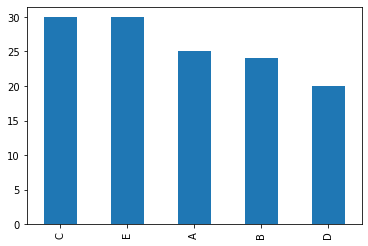

In [52]:
data["company"].value_counts().plot(kind="bar")

In [53]:
data["diameter"].value_counts()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: diameter, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diameter', ylabel='count'>

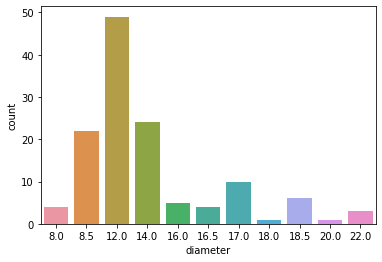

In [54]:
sns.countplot(data["diameter"])

In [55]:
data["topping"].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

<AxesSubplot:xlabel='count', ylabel='topping'>

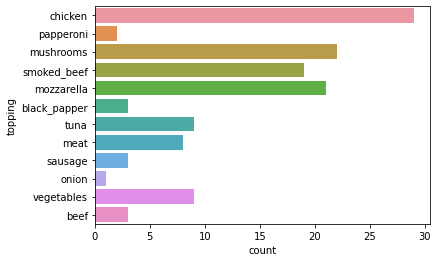

In [57]:
sns.countplot(y = data["topping"])

In [58]:
data["variant"].value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

<AxesSubplot:xlabel='count', ylabel='variant'>

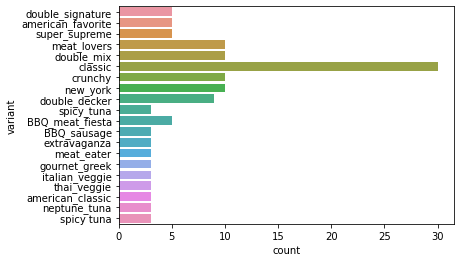

In [60]:
sns.countplot(y = data["variant"])

In [61]:
data["size"].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

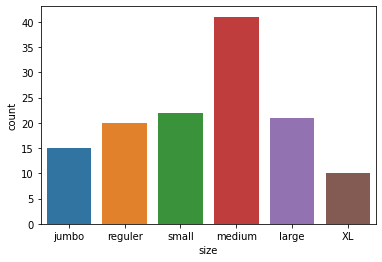

In [62]:
sns.countplot(data["size"])

In [63]:
data["extra_sauce"].value_counts()

yes    76
no     53
Name: extra_sauce, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_sauce', ylabel='count'>

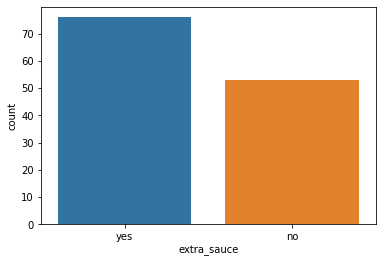

In [64]:
sns.countplot(data["extra_sauce"])

In [65]:
data["extra_cheese"].value_counts()

yes    86
no     43
Name: extra_cheese, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_cheese', ylabel='count'>

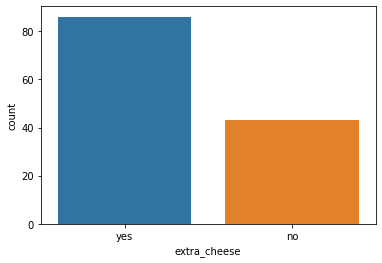

In [66]:
sns.countplot(data["extra_cheese"])

In [67]:
data["extra_mushrooms"].value_counts()

yes    72
no     57
Name: extra_mushrooms, dtype: int64

C:\Users\shail\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='extra_mushrooms', ylabel='count'>

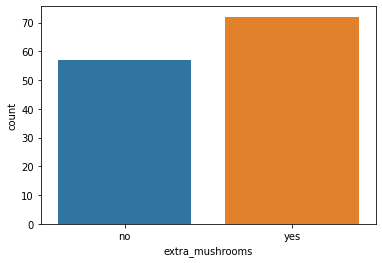

In [68]:
sns.countplot(data["extra_mushrooms"])

### biavarite analysis

In [69]:
data.columns

Index(['company', 'Price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<AxesSubplot:xlabel='company', ylabel='Price'>

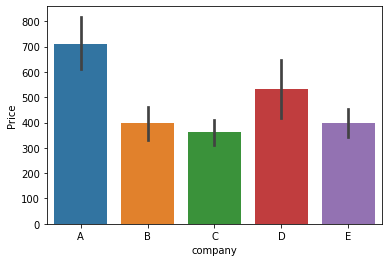

In [70]:
sns.barplot(data=data , x = "company" , y= "Price")

<AxesSubplot:xlabel='diameter', ylabel='Price'>

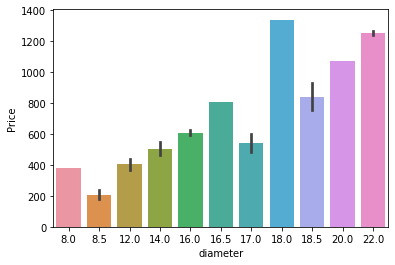

In [71]:
sns.barplot(data=data , x="diameter", y ="Price")

<AxesSubplot:xlabel='Price', ylabel='topping'>

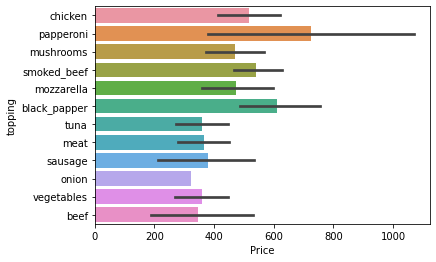

In [77]:
sns.barplot(data=data , y="topping", x = "Price")

<AxesSubplot:xlabel='size', ylabel='Price'>

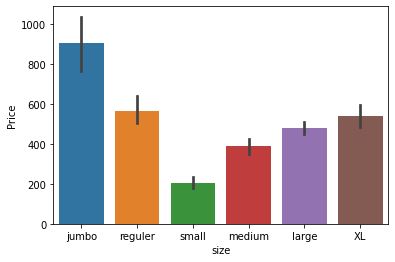

In [79]:
sns.barplot(data=data, x="size", y="Price")

In [82]:
data[data["Price"].max() == data["Price"]]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


- the most expensive pizza

In [84]:
data[data["Price"].min() == data["Price"]]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
25,B,126.9,8.5,mozzarella,classic,small,yes,no,no
89,D,126.9,8.5,mozzarella,classic,small,yes,no,yes
100,E,126.9,8.5,mozzarella,classic,small,yes,no,yes


- pizza with cheapest price

In [89]:
data[data["size"] == "jumbo"]["diameter"]

0     22.0
1     20.0
4     18.0
5     18.5
6     16.0
10    18.5
11    16.0
15    18.5
16    16.0
20    22.0
21    18.5
79    18.5
80    16.0
84    22.0
85    18.5
Name: diameter, dtype: float64

In [90]:
data[data["size"] == "XL"]["diameter"]

29     17.0
35     17.0
41     17.0
47     17.0
93     17.0
99     17.0
104    17.0
110    17.0
116    17.0
122    17.0
Name: diameter, dtype: float64

### outliers detection

In [93]:
data[(data["size"]=="jumbo") & (data["diameter"]<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


### removing outliers

In [97]:
data = data.drop(data.index[[6,11,16,80]])

In [98]:
data[(data["size"]=="jumbo") & (data["diameter"]<=16)]

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


- sucessully remove outliers

## Label Encoding

In [104]:
cat_cols = data.select_dtypes(include=["object"]).columns

In [105]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [106]:
lb = LabelEncoder()

In [107]:
for i in cat_cols:
    data[i]=lb.fit_transform(data[i])

In [108]:
data.head(2)

,company,Price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0


In [109]:
x = data.drop("Price", axis=1)
y = data["Price"]

In [117]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

In [118]:
x_train.shape

(100, 8)

In [119]:
x_test.shape

(25, 8)

## model Building

In [127]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [128]:

ls = Lasso()
ls.fit(x_train , y_train)

Lasso()

In [129]:

dc = DecisionTreeRegressor()
dc.fit(x_train , y_train)

DecisionTreeRegressor()

In [130]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [133]:

xg = XGBRegressor()
xg.fit(x_train , y_train)

ext = ExtraTreesRegressor()
ext.fit(x_train , y_train)

ExtraTreesRegressor()

## Prediction on test data

In [134]:
y_predlr = lr.predict(x_test)
y_predls = ls.predict(x_test)
y_preddc = dc.predict(x_test)
y_predrf = rf.predict(x_test)
y_predxg = xg.predict(x_test)
y_predext = ext.predict(x_test)

## Evaluation of Algorithm

In [136]:
score1 = metrics.r2_score(y_test , y_predlr)
score2 = metrics.r2_score(y_test , y_predls)
score3 = metrics.r2_score(y_test , y_preddc)
score4 = metrics.r2_score(y_test , y_predrf)
score5 = metrics.r2_score(y_test , y_predxg)
score6 = metrics.r2_score(y_test , y_predext)

In [138]:
finaldf = pd.DataFrame({"Models" : ["LR", "LASSO", "DC", "RF" ,"XG", "EXT"], 
                       "R2Score": [score1, score2 , score3 , score4, score5 , score6]})

In [139]:
finaldf

,Models,R2Score
0,LR,0.746130
1,LASSO,0.742897
2,DC,0.932965
3,RF,0.856683
4,XG,0.876582
5,EXT,0.875273


<AxesSubplot:xlabel='Models', ylabel='R2Score'>

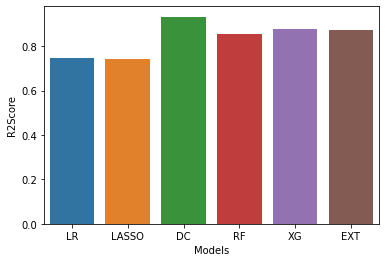

In [140]:
sns.barplot(data=finaldf , x="Models", y="R2Score")

In [145]:
pickle.dump(dc,open("DC.pkl", "wb"))